In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
import heapq
def calc_sample_durations(queue_n, window_k, alpha, window_limit):
    if queue_n < window_k:
        return np.zeros(queue_n)
    window_queue = list((0, i) for i in range(window_k))
    heapq.heapify(window_queue)
    k = 0
    window_limits = [1] * window_k
    durations = []
    for k in range(queue_n):
        (duration, window_num) = heapq.heappop(window_queue)
        durations.append(duration)
        if window_limit == -1 or window_limits[window_num] < window_limit:
            next_this_window = duration + np.random.exponential(alpha)
            heapq.heappush(window_queue, (next_this_window, window_num))
            window_limits[window_num] += 1
    if len(durations) > queue_n:
        durations = durations[:queue_n]
    if len(durations) < queue_n:
        durations += [np.inf] * (queue_n - len(durations))
    return np.array(durations)

In [23]:
def calc_sample_durations_mean(queue_n, window_k, alpha, window_limit, sample_size):
    mean_durations = np.array([0.0] * queue_n)
    for i in range(sample_size):
        mean_durations += calc_sample_durations(queue_n, window_k, alpha, window_limit)
    mean_durations /= sample_size
    return mean_durations

In [91]:
def plot_durations_mean(queue_n, window_k, alphas, window_limit, sample_size):
    plt.figure(figsize=(20, 15))
    queue_range = np.arange(1, queue_n+1)
    for alpha in alphas:
        sample_durations_mean = calc_sample_durations_mean(queue_n, window_k, alpha, window_limit, sample_size)
        plt.plot(queue_range, sample_durations_mean, label=f"Alpha {alpha}")
    plt.legend()
    plt.title(f"Expected duration of waiting in bank for queue of 1-{queue_n+1} visitors, windows time distributed as Exp(alpha), window limit {window_limit}")
    plt.xlabel("Number of visitor")
    plt.ylabel("Waiting time")
    plt.show()

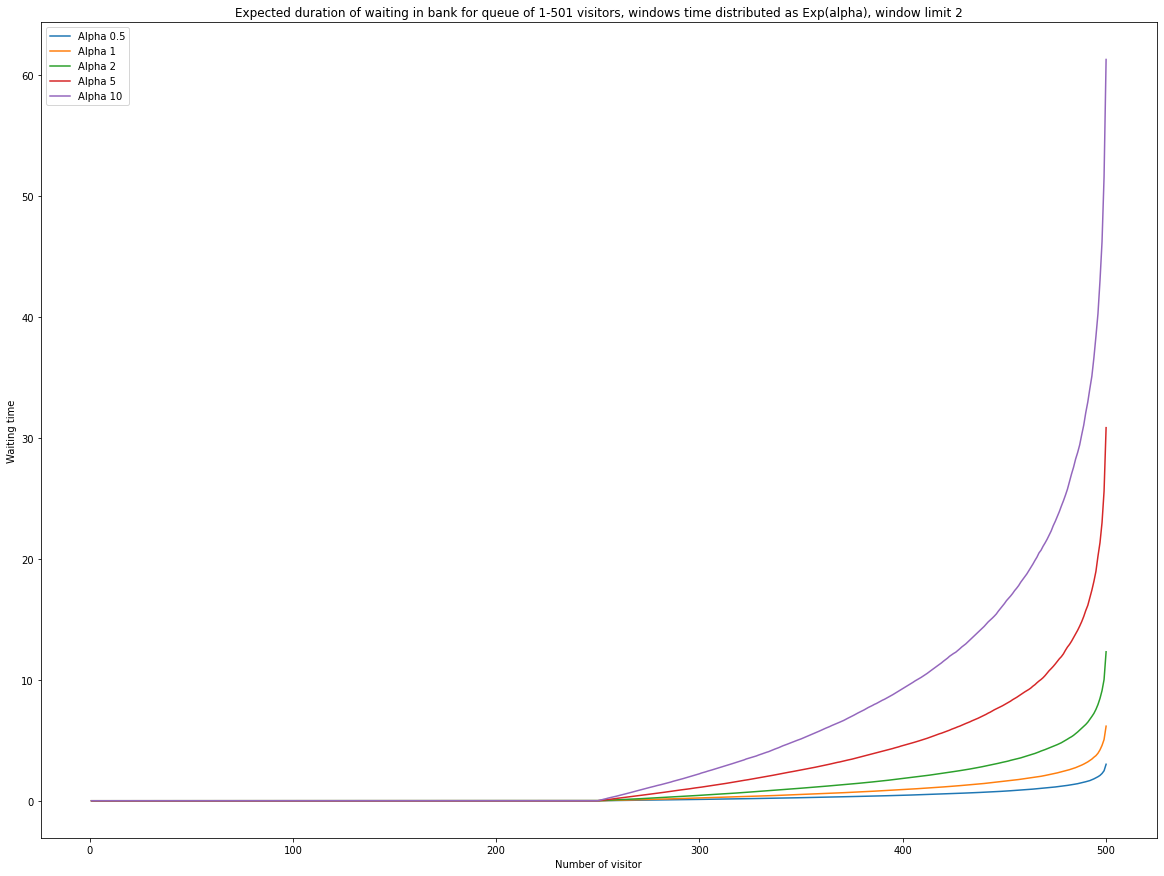

In [92]:
plot_durations_mean(500, 250, [0.5, 1, 2, 5, 10], 2, 100)

На паре мы установили, что матожидание разности между соседними элементами выборки, то есть $X_{(k)} - X_{(k-1)} \sim Exp((n-k)\alpha)$, значит, т.к. матожидание линейно, то $X_{(k)} \sim \sum_{i=1}^{k} \frac{1}{(n-k)\alpha}$ 

В начале ровно 0, так как первые посетители не ждут в очереди вообще

In [136]:
def plot_durations_mean_error(queue_n, window_k, alphas, window_limit, sample_size):
    plt.figure(figsize=(20, 15))
    queue_range = np.arange(1, queue_n+1)
    for alpha in alphas:
        sample_durations_mean_correct = np.zeros(queue_n)
        for k in range(window_k+1, queue_n):
            if window_limit == -1:
                sample_durations_mean_correct[k] = sample_durations_mean_correct[k-1] + alpha/(queue_n-window_k)
            else:
                sample_durations_mean_correct[k] = sample_durations_mean_correct[k-1] + alpha/(queue_n-k)        
        sample_durations_mean = calc_sample_durations_mean(queue_n, window_k, alpha, window_limit, sample_size)
        sample_durations_mean_error = np.abs(sample_durations_mean-sample_durations_mean_correct)
        plt.plot(queue_range[window_k:], sample_durations_mean_error[window_k:], label=f"Alpha {alpha}")
    plt.legend()
    plt.title(f"Error of expected duration of waiting in bank for queue of 1-{queue_n+1} visitors, windows time distributed as Exp(alpha), window limit {window_limit}")
    plt.xlabel("Number of visitor")
    plt.ylabel("Waiting time")
    plt.show()

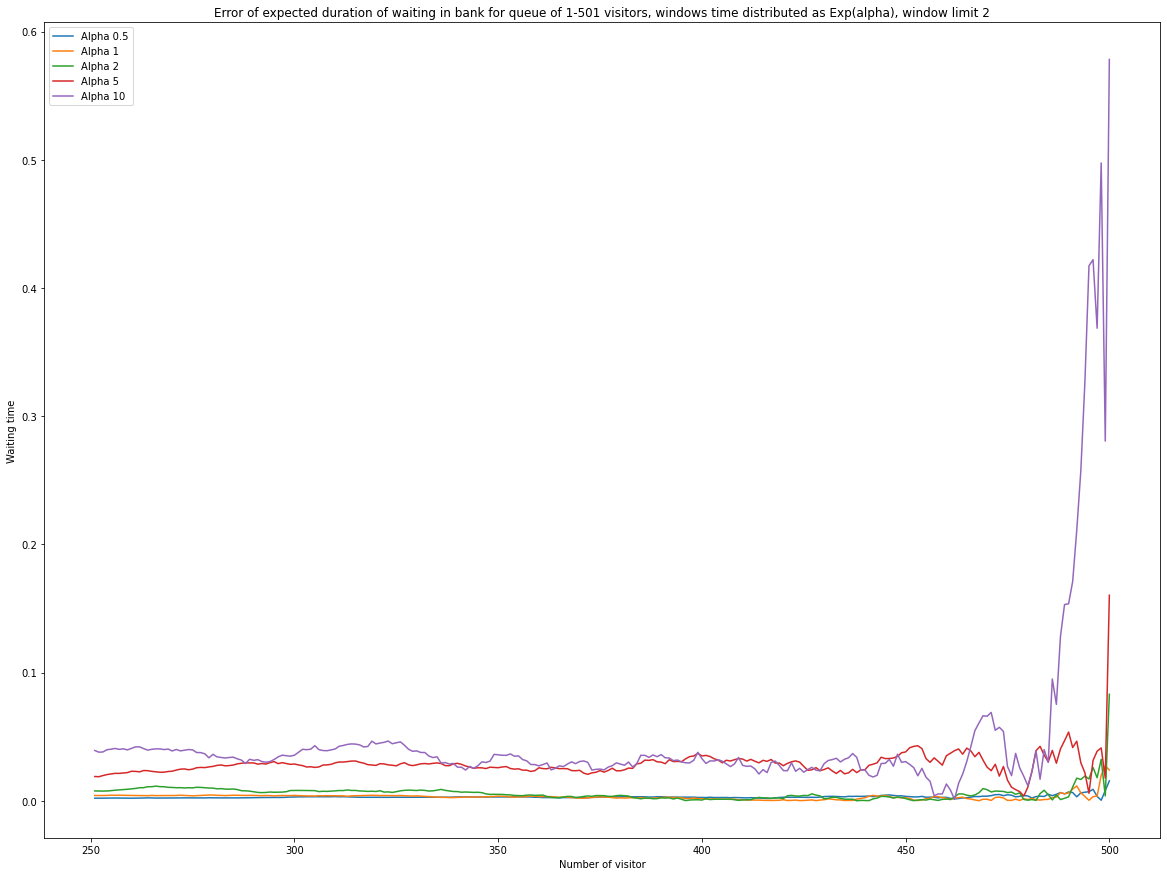

In [137]:
plot_durations_mean_error(500, 250, [0.5, 1, 2, 5, 10], 2, 1000)

Ошибка получилось не очень большой, кроме как в конце (думаю, это скорее недостаток модели) 

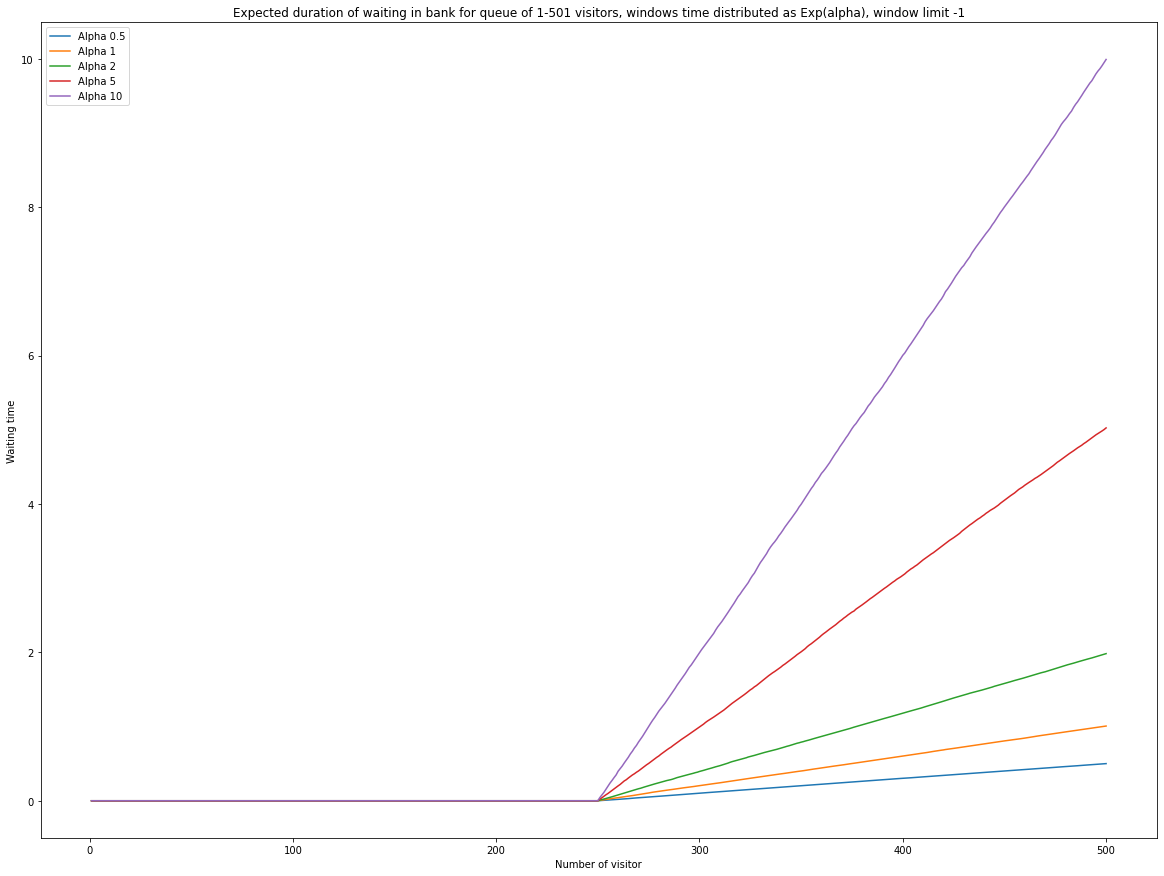

In [138]:
plot_durations_mean(500, 250, [0.5, 1, 2, 5, 10], -1, 100)

Можно заметить, что матожидание $X_{(k)}$ растет линейно, а именно, $\alpha \cdot \frac k n$

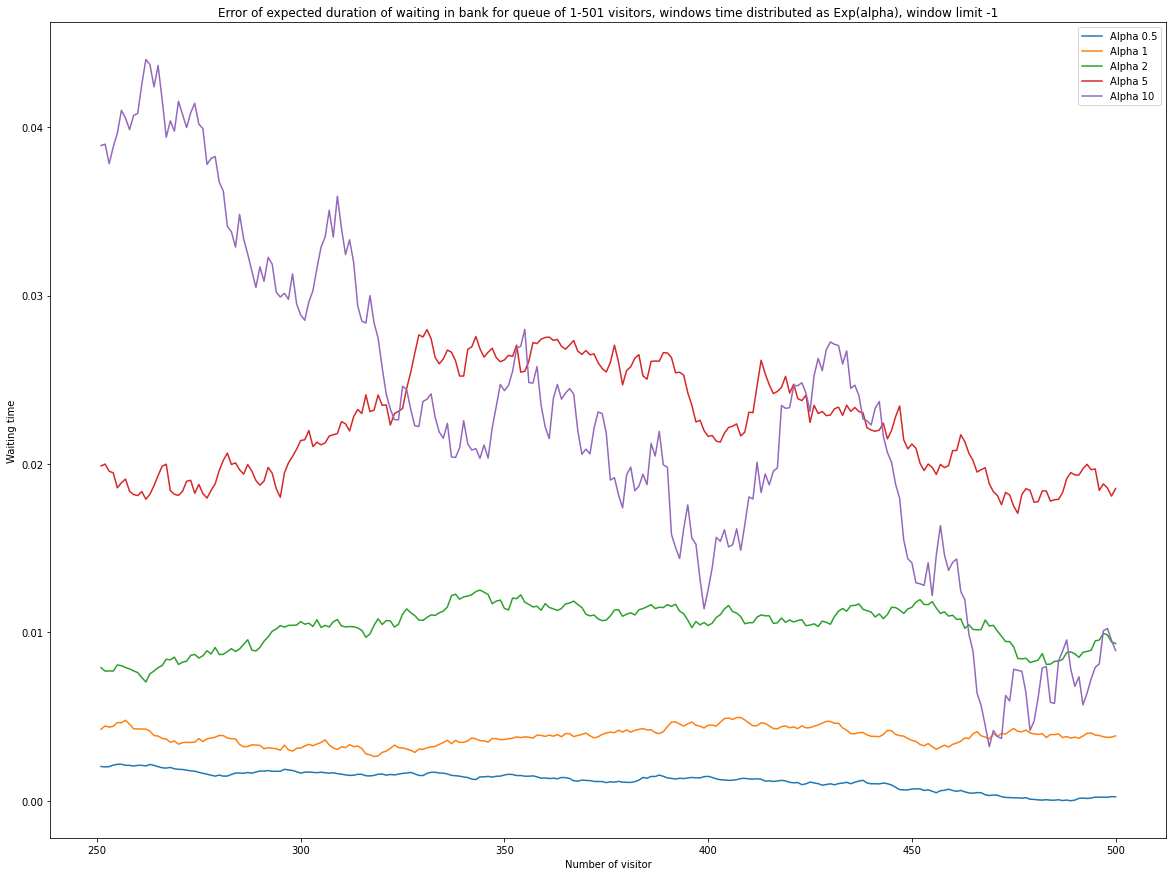

In [139]:
plot_durations_mean_error(500, 250, [0.5, 1, 2, 5, 10], -1, 1000)

In [98]:
def plot_durations_mean_window(queue_n, window_k_range, alpha, window_limit, sample_size):
    window_k_from, window_k_to = window_k_range
    f = plt.figure(figsize=(20, 15))
    window_range = np.arange(window_k_from, window_k_to + 1)
    durations_range = []
    for window_k in window_range:
        durations_range.append(calc_sample_durations_mean(queue_n, window_k, alpha, window_limit, sample_size))
    durations_range = np.array(durations_range).transpose()
    for (i, durations) in enumerate(durations_range):
        plt.plot(window_range, durations, label=f'Visitor #{i}')
    plt.legend()
    plt.title(f"Expected duration of waiting in bank for queue of {queue_n} visitors, windows time distributed as Exp({alpha}), window limit {window_limit}")
    plt.xlabel("Number of windows")
    plt.ylabel("Waiting time")
    plt.show()

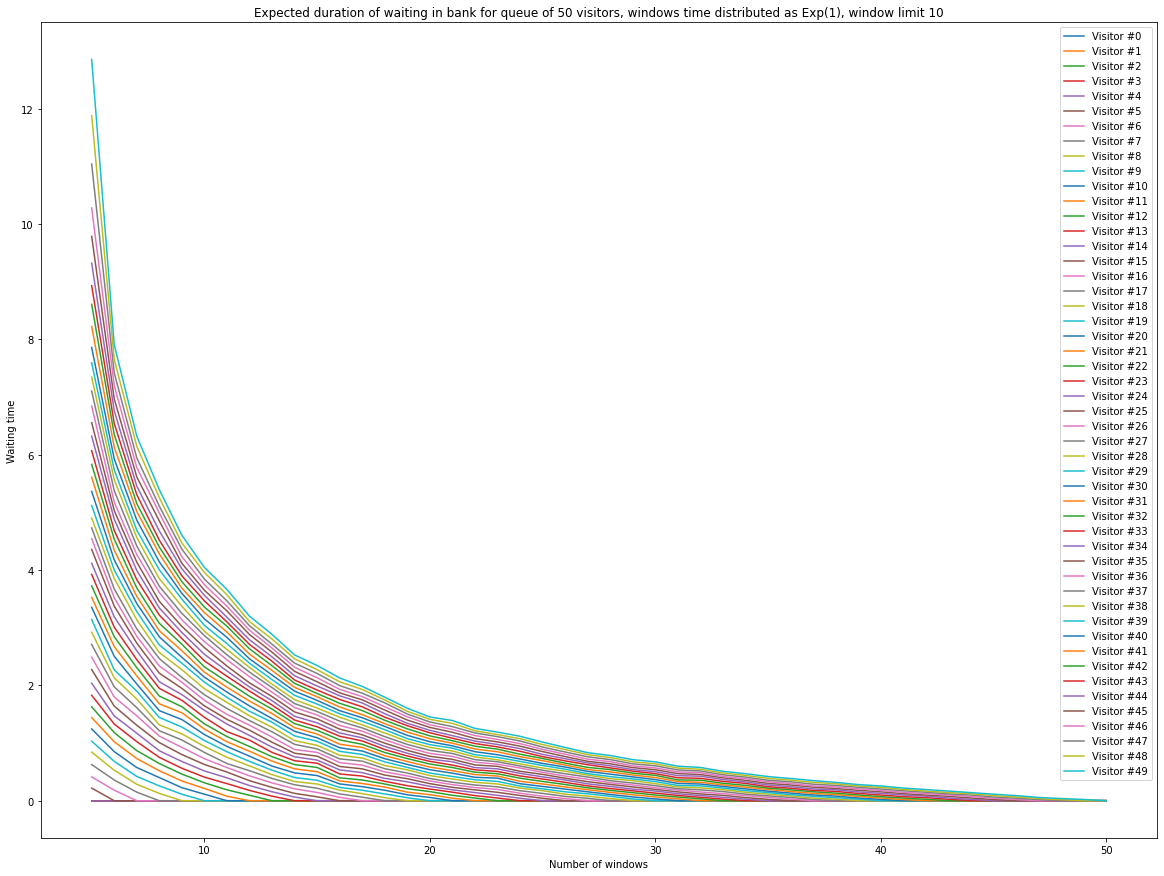

In [99]:
plot_durations_mean_window(50, (5, 50), 1, 10, 100)

Время ожидания $k$-ого посетителя в зависимости от количества окон

График выглядит как экспонента с отрицательным показателем степени